# Hawk/Dove multiple risk attitudes with adjustment - convergence length analysis



In [6]:
# how long do hawkdove multi sims take to convergence?

import polars as pl

# df = pd.read_csv("../data/hawkdovemulti/2024-01-25T180759_472814_model.csv")

df = pl.read_csv("../../data/hawkdovemulti/job_task_2024-02-07T064022_648635_model.csv")


In [7]:
df.head()

RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,risk_distribution,adjust_payoff,max_agent_points,percent_hawk,rolling_percent_hawk,status,total_agents,population_risk_category,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9
i64,i64,i64,i64,str,i64,i64,i64,f64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
6,0,31,10,"""adopt""",8,8,8,0.5,2,"""skewed right""","""recent""",618,0.42,0.460333,"""converged""",100,6,0,7,6,10,17,10,14,10,18,8
8,0,53,10,"""adopt""",8,8,8,0.5,2,"""bimodal""","""recent""",1125,0.52,0.52,"""converged""",100,13,35,9,6,2,0,0,0,6,15,27
7,0,65,10,"""adopt""",8,8,8,0.5,2,"""skewed right""","""total""",572,0.0,0.5,"""converged""",100,5,0,8,31,4,19,7,31,0,0,0
4,0,60,10,"""adopt""",8,8,8,0.5,2,"""skewed left""","""recent""",918,0.34,0.58,"""converged""",100,13,10,15,24,15,12,9,9,2,1,3
12,0,61,10,"""adopt""",8,8,8,0.5,10,"""normal""","""recent""",669,1.0,0.51,"""converged""",100,5,2,7,7,37,11,16,13,5,2,0


In [8]:
df.shape

(8905, 28)

In [9]:
df.columns

['RunId',
 'iteration',
 'Step',
 'grid_size',
 'risk_adjustment',
 'play_neighborhood',
 'observed_neighborhood',
 'adjust_neighborhood',
 'hawk_odds',
 'adjust_every',
 'risk_distribution',
 'adjust_payoff',
 'max_agent_points',
 'percent_hawk',
 'rolling_percent_hawk',
 'status',
 'total_agents',
 'population_risk_category',
 'total_r0',
 'total_r1',
 'total_r2',
 'total_r3',
 'total_r4',
 'total_r5',
 'total_r6',
 'total_r7',
 'total_r8',
 'total_r9']

In [10]:
df["Step"].describe()

statistic,value
str,f64
"""count""",8905.0
"""null_count""",0.0
"""mean""",159.717911
"""std""",278.84783
"""min""",31.0
"""25%""",62.0
"""50%""",92.0
"""75%""",151.0
"""max""",2000.0


<Axes: >

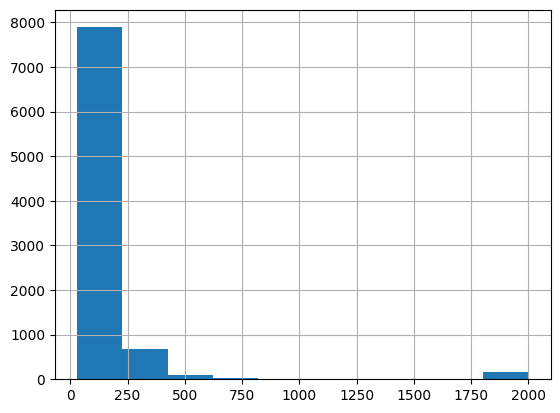

In [11]:
df.to_pandas().Step.hist()

In [12]:
long_runs = df.filter(pl.col("Step") > 150)
long_runs.head(10)

RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,risk_distribution,adjust_payoff,max_agent_points,percent_hawk,rolling_percent_hawk,status,total_agents,population_risk_category,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9
i64,i64,i64,i64,str,i64,i64,i64,f64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
14,0,151,10,"""adopt""",8,8,8,0.5,10,"""skewed left""","""recent""",2185,0.89,0.629333,"""converged""",100,2,25,12,37,10,0,0,11,0,5,0
15,0,152,10,"""adopt""",8,8,8,0.5,10,"""skewed left""","""total""",1876,0.18,0.580667,"""converged""",100,3,10,41,20,16,0,0,0,13,0,0
23,0,191,10,"""adopt""",8,8,8,0.5,20,"""normal""","""total""",1696,0.11,0.552,"""converged""",100,5,11,17,5,45,22,0,0,0,0,0
1,0,183,10,"""adopt""",8,8,8,0.5,2,"""uniform""","""total""",4000,0.72,0.52,"""converged""",100,13,10,0,36,0,0,9,0,24,0,21
50,0,225,10,"""adopt""",8,8,8,0.25,20,"""uniform""","""recent""",3892,0.5,0.562,"""converged""",100,13,20,19,0,3,8,11,17,3,14,5
18,0,334,10,"""adopt""",8,8,8,0.5,10,"""bimodal""","""recent""",5923,0.59,0.531667,"""converged""",100,13,45,0,0,9,0,0,1,16,10,19
80,0,249,10,"""adopt""",8,8,8,0.75,20,"""uniform""","""recent""",4060,0.36,0.528333,"""converged""",100,3,17,0,35,6,0,11,11,1,0,19
35,0,151,10,"""adopt""",8,8,8,0.25,2,"""skewed left""","""total""",1787,0.97,0.542,"""converged""",100,5,8,20,0,26,0,46,0,0,0,0
85,0,200,10,"""adopt""",8,8,8,0.75,20,"""skewed left""","""total""",2858,0.12,0.505,"""converged""",100,4,0,6,52,0,0,0,0,0,42,0


In [13]:
long_runs["grid_size"].value_counts()

grid_size,count
i64,u32
10,1331
25,913


In [14]:
long_runs["play_neighborhood"].value_counts()

play_neighborhood,count
i64,u32
8,788
24,879
4,577


In [15]:
long_runs["observed_neighborhood"].value_counts()

observed_neighborhood,count
i64,u32
4,409
8,820
24,1015


In [16]:
long_runs["adjust_neighborhood"].value_counts()

adjust_neighborhood,count
i64,u32
24,859
4,631
8,754


In [17]:
long_runs["adjust_every"].value_counts()

adjust_every,count
i64,u32
20,1168
2,252
10,824


In [18]:
long_runs["risk_adjustment"].value_counts()

risk_adjustment,count
str,u32
"""adopt""",1355
"""average""",889


In [19]:
long_runs["risk_distribution"].value_counts()

risk_distribution,count
str,u32
"""skewed right""",198
"""skewed left""",547
"""normal""",96
"""bimodal""",791
"""uniform""",612


In [20]:
# how many did not complete?
df["status"].value_counts()

status,count
str,u32
"""running""",164
"""converged""",8741


In [21]:
incomplete = df.filter(pl.col("status") == 'running')
incomplete

RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,risk_distribution,adjust_payoff,max_agent_points,percent_hawk,rolling_percent_hawk,status,total_agents,population_risk_category,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9
i64,i64,i64,i64,str,i64,i64,i64,f64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
160,0,2000,10,"""adopt""",8,8,24,0.75,10,"""uniform""","""recent""",41325,0.51,0.571333,"""running""",100,6,16,0,0,52,2,0,0,5,25,0
254,0,2000,10,"""adopt""",8,8,4,0.75,10,"""skewed left""","""recent""",31556,0.73,0.640333,"""running""",100,2,30,33,6,5,14,0,7,5,0,0
196,0,2000,10,"""adopt""",8,8,4,0.5,10,"""skewed right""","""recent""",34437,0.42,0.515333,"""running""",100,13,0,10,12,11,11,6,21,8,17,4
358,0,2000,10,"""adopt""",8,24,8,0.75,20,"""bimodal""","""recent""",35949,0.55,0.538333,"""running""",100,13,18,21,9,9,0,0,13,0,1,29
288,0,2000,10,"""adopt""",8,24,8,0.5,10,"""bimodal""","""recent""",41645,0.43,0.503333,"""running""",100,4,23,26,13,0,0,0,1,8,0,29
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6148,0,2000,25,"""adopt""",24,24,4,0.5,20,"""bimodal""","""recent""",100585,0.6192,0.59312,"""running""",625,13,197,66,30,29,5,0,30,32,38,198
6208,0,2000,25,"""adopt""",24,24,4,0.75,20,"""bimodal""","""recent""",110218,0.5968,0.5664,"""running""",625,13,167,34,81,25,0,5,1,44,62,206
6198,0,2000,25,"""adopt""",24,24,4,0.75,10,"""bimodal""","""recent""",101325,0.5968,0.575467,"""running""",625,13,228,34,31,22,5,4,22,40,74,165


In [22]:
incomplete["grid_size"].value_counts()

grid_size,count
i64,u32
25,19
10,145


In [23]:
incomplete["play_neighborhood"].value_counts()

play_neighborhood,count
i64,u32
8,39
4,55
24,70


In [24]:
incomplete["observed_neighborhood"].value_counts()

observed_neighborhood,count
i64,u32
4,28
8,48
24,88


In [25]:
incomplete["adjust_neighborhood"].value_counts()

adjust_neighborhood,count
i64,u32
24,69
4,39
8,56


In [26]:
incomplete["adjust_every"].value_counts()

adjust_every,count
i64,u32
2,11
10,88
20,65


In [27]:
incomplete["risk_adjustment"].value_counts()

risk_adjustment,count
str,u32
"""adopt""",150
"""average""",14


In [28]:
incomplete["risk_distribution"].value_counts()

risk_distribution,count
str,u32
"""skewed left""",20
"""uniform""",35
"""normal""",2
"""bimodal""",96
"""skewed right""",11


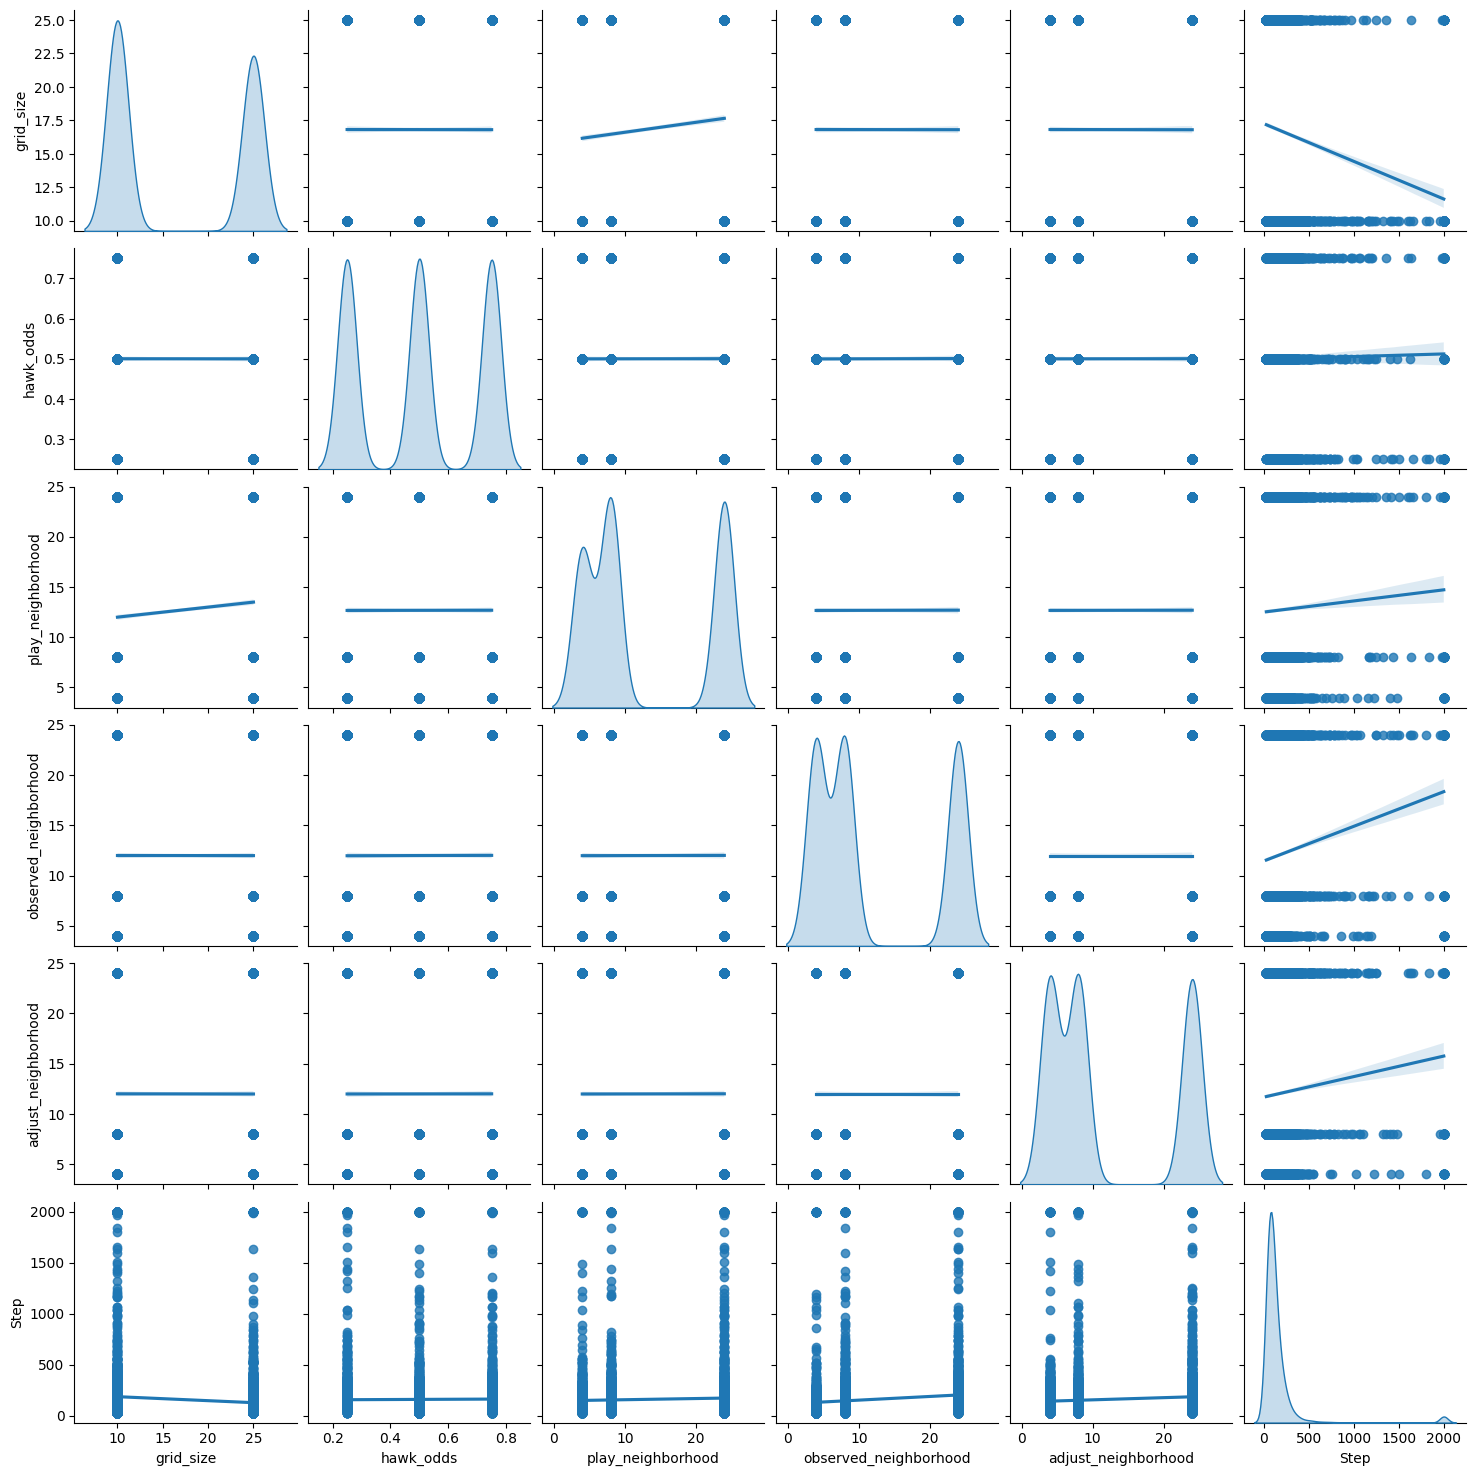

In [29]:
# is there any obvious correlation between parameters and how long it takes to converge?

import seaborn as sns

df_compare = df[['grid_size', 'risk_adjustment', 'hawk_odds', 'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood', 'Step']]

# pairplot only works with pandas dataframes, so we have to convert
_ = sns.pairplot(df_compare.to_pandas(), kind="reg", diag_kind="kde")